In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\Sql\upi_transactions_2024.csv")

In [3]:
df

,id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,08-10-2024 15:17,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,11-04-2024 06:56,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0
2,TXN0000000003,02-04-2024 13:27,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0
3,TXN0000000004,07-01-2024 10:09,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1
4,TXN0000000005,23-01-2024 19:04,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,TXN0000249996,08-11-2024 22:41,Recharge,Food,373,SUCCESS,36-45,26-35,Telangana,ICICI,HDFC,iOS,5G,0,22,Friday,0
249996,TXN0000249997,15-12-2024 02:58,P2P,Utilities,2025,SUCCESS,36-45,26-35,Rajasthan,HDFC,Yes Bank,Android,5G,0,2,Sunday,1
249997,TXN0000249998,27-11-2024 16:33,P2P,Food,468,SUCCESS,26-35,18-25,West Bengal,ICICI,ICICI,Android,4G,0,16,Wednesday,0
249998,TXN0000249999,05-01-2024 13:31,Recharge,Healthcare,284,SUCCESS,18-25,36-45,Andhra Pradesh,Axis,ICICI,iOS,4G,0,13,Friday,0


In [4]:
print(df.shape)
print(df.columns)

(250000, 17)
Index([' id', 'timestamp', 'transaction type', 'merchant_category',
       'amount (INR)', 'transaction_status', 'sender_age_group',
       'receiver_age_group', 'sender_state', 'sender_bank', 'receiver_bank',
       'device_type', 'network_type', 'fraud_flag', 'hour_of_day',
       'day_of_week', 'is_weekend'],
      dtype='object')


In [5]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['id', 'timestamp', 'transaction type', 'merchant_category',
       'amount (INR)', 'transaction_status', 'sender_age_group',
       'receiver_age_group', 'sender_state', 'sender_bank', 'receiver_bank',
       'device_type', 'network_type', 'fraud_flag', 'hour_of_day',
       'day_of_week', 'is_weekend'],
      dtype='object')


In [6]:
df['id_num'] = df['id'].str.extract('(\d+)', expand=False).astype(int)
print(df[['id', 'id_num']])


                   id  id_num
0       TXN0000000001       1
1       TXN0000000002       2
2       TXN0000000003       3
3       TXN0000000004       4
4       TXN0000000005       5
...               ...     ...
249995  TXN0000249996  249996
249996  TXN0000249997  249997
249997  TXN0000249998  249998
249998  TXN0000249999  249999
249999  TXN0000250000  250000

[250000 rows x 2 columns]


In [7]:
print(df.head(2))

              id         timestamp transaction type merchant_category  \
0  TXN0000000001  08-10-2024 15:17              P2P     Entertainment   
1  TXN0000000002  11-04-2024 06:56              P2M           Grocery   

   amount (INR) transaction_status sender_age_group receiver_age_group  \
0           868            SUCCESS            26-35              18-25   
1          1011            SUCCESS            26-35              26-35   

    sender_state sender_bank receiver_bank device_type network_type  \
0          Delhi        Axis           SBI     Android           4G   
1  Uttar Pradesh       ICICI          Axis         iOS           4G   

   fraud_flag  hour_of_day day_of_week  is_weekend  id_num  
0           0           15     Tuesday           0       1  
1           0            6    Thursday           0       2  


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  250000 non-null  object
 1   timestamp           250000 non-null  object
 2   transaction type    250000 non-null  object
 3   merchant_category   250000 non-null  object
 4   amount (INR)        250000 non-null  int64 
 5   transaction_status  250000 non-null  object
 6   sender_age_group    250000 non-null  object
 7   receiver_age_group  250000 non-null  object
 8   sender_state        250000 non-null  object
 9   sender_bank         250000 non-null  object
 10  receiver_bank       250000 non-null  object
 11  device_type         250000 non-null  object
 12  network_type        250000 non-null  object
 13  fraud_flag          250000 non-null  int64 
 14  hour_of_day         250000 non-null  int64 
 15  day_of_week         250000 non-null  object
 16  is

In [9]:
print(df.isnull())

           id  timestamp  transaction type  merchant_category  amount (INR)  \
0       False      False             False              False         False   
1       False      False             False              False         False   
2       False      False             False              False         False   
3       False      False             False              False         False   
4       False      False             False              False         False   
...       ...        ...               ...                ...           ...   
249995  False      False             False              False         False   
249996  False      False             False              False         False   
249997  False      False             False              False         False   
249998  False      False             False              False         False   
249999  False      False             False              False         False   

        transaction_status  sender_age_group  recei

In [10]:
duplicates = df.duplicated()
print(duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
249995    False
249996    False
249997    False
249998    False
249999    False
Length: 250000, dtype: bool


In [11]:
df.describe

<bound method NDFrame.describe of                    id         timestamp transaction type merchant_category  \
0       TXN0000000001  08-10-2024 15:17              P2P     Entertainment   
1       TXN0000000002  11-04-2024 06:56              P2M           Grocery   
2       TXN0000000003  02-04-2024 13:27              P2P           Grocery   
3       TXN0000000004  07-01-2024 10:09              P2P              Fuel   
4       TXN0000000005  23-01-2024 19:04              P2P          Shopping   
...               ...               ...              ...               ...   
249995  TXN0000249996  08-11-2024 22:41         Recharge              Food   
249996  TXN0000249997  15-12-2024 02:58              P2P         Utilities   
249997  TXN0000249998  27-11-2024 16:33              P2P              Food   
249998  TXN0000249999  05-01-2024 13:31         Recharge        Healthcare   
249999  TXN0000250000  17-01-2024 15:23              P2P     Entertainment   

        amount (INR) transact

In [12]:
numeric_cols = ['amount (INR)', 'fraud_flag', 'hour_of_day', 'is_weekend']

# Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

              amount (INR)  fraud_flag  hour_of_day  is_weekend
amount (INR)      1.000000    0.004449    -0.001604   -0.000653
fraud_flag        0.004449    1.000000     0.001323    0.001221
hour_of_day      -0.001604    0.001323     1.000000    0.001496
is_weekend       -0.000653    0.001221     0.001496    1.000000


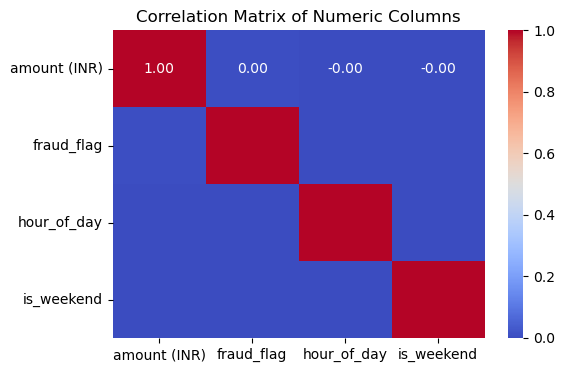

In [13]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

In [14]:
numeric_cols = ['amount (INR)','hour_of_day']

# Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

              amount (INR)  hour_of_day
amount (INR)      1.000000    -0.001604
hour_of_day      -0.001604     1.000000


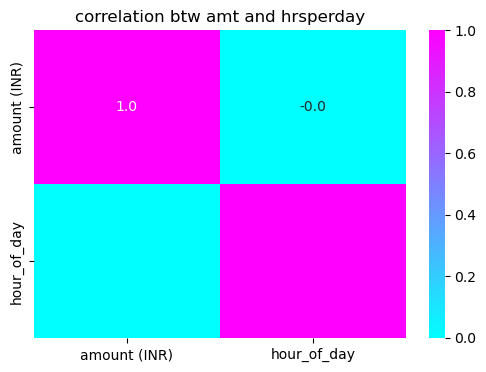

In [15]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='cool', fmt='.1f')
plt.title("correlation btw amt and hrsperday")
plt.show()

VISUALIZATIONS

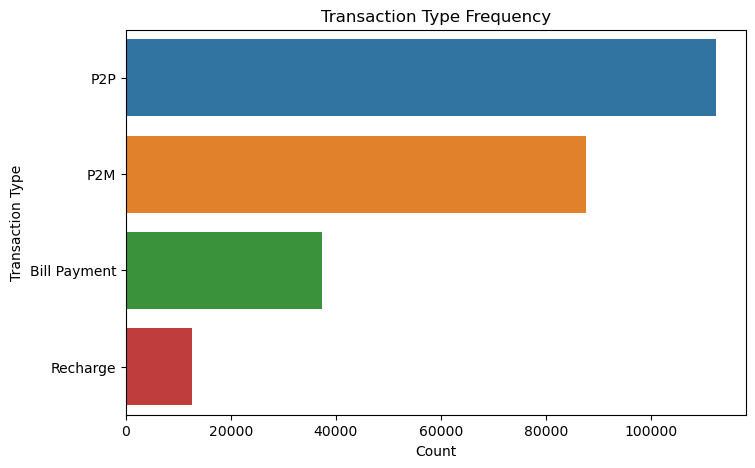

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(y='transaction type', data=df, order=df['transaction type'].value_counts().index)
plt.title('Transaction Type Frequency')
plt.xlabel('Count')
plt.ylabel('Transaction Type')
plt.show()

In [17]:
region_fraud = df.groupby('sender_state').agg(total_transactions = ('id', 'count'),fraud_cases = ('fraud_flag', 'sum')).reset_index()
region_fraud['fraud_rate(%)'] = (region_fraud['fraud_cases']/region_fraud['total_transactions'])*100
region_fraud = region_fraud.sort_values(by='fraud_rate(%)', ascending=False)
print(region_fraud)

     sender_state  total_transactions  fraud_cases  fraud_rate(%)
3       Karnataka               29756           69       0.231886
5       Rajasthan               19981           46       0.230219
2         Gujarat               20061           43       0.214346
1           Delhi               24870           50       0.201045
4     Maharashtra               37427           71       0.189703
9     West Bengal               19972           35       0.175245
0  Andhra Pradesh               20006           35       0.174948
7       Telangana               22435           39       0.173836
8   Uttar Pradesh               30125           52       0.172614
6      Tamil Nadu               25367           40       0.157685


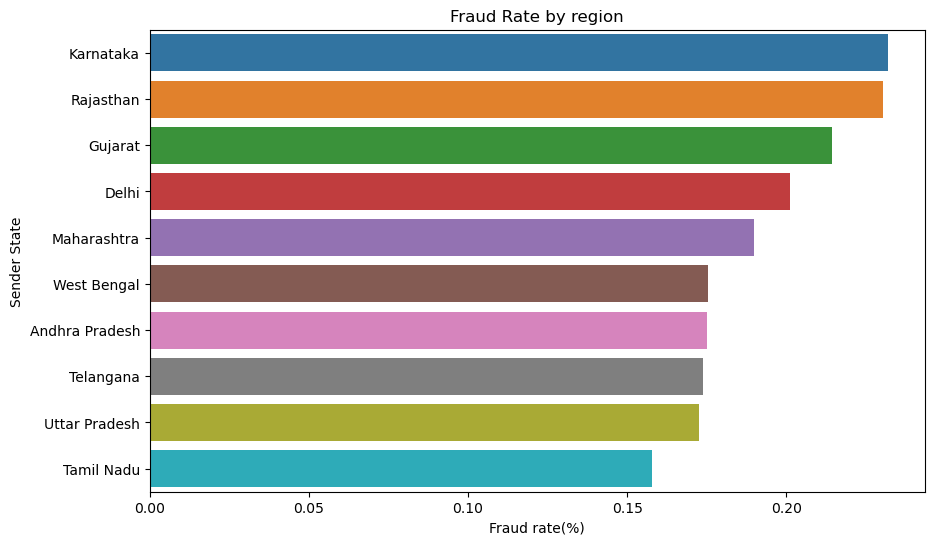

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='fraud_rate(%)', y='sender_state', data=region_fraud)
plt.title('Fraud Rate by region')
plt.xlabel('Fraud rate(%)')
plt.ylabel('Sender State')
plt.show()

In [19]:
fraud_rate = df.groupby('transaction type').agg(total_transactions = ('id', 'count'),fraud_cases = ('fraud_flag', 'sum')).reset_index()
fraud_rate['fraud_rate(%)' ] = (fraud_rate['fraud_cases']/fraud_rate['total_transactions'])*100
print(fraud_rate)

  transaction type  total_transactions  fraud_cases  fraud_rate(%)
0     Bill Payment               37368           77       0.206059
1              P2M               87660          167       0.190509
2              P2P              112445          206       0.183201
3         Recharge               12527           30       0.239483


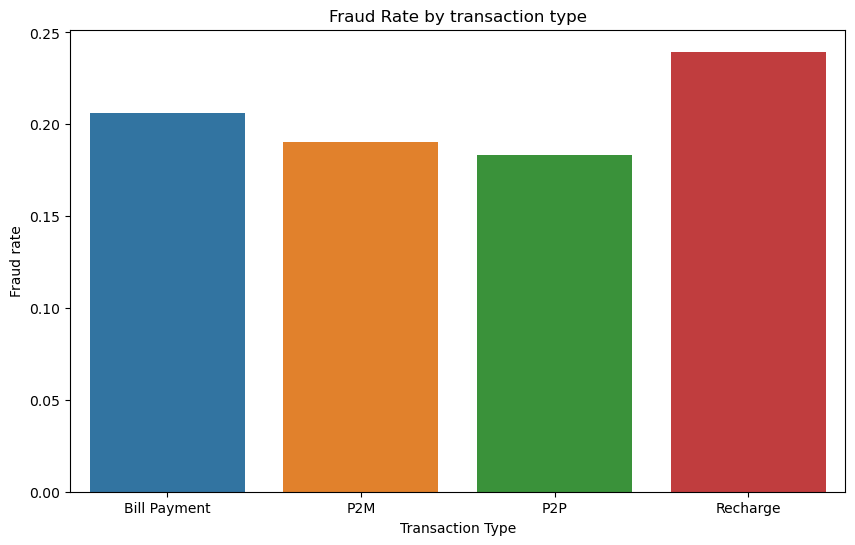

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='transaction type', y='fraud_rate(%)', data=fraud_rate)
plt.title('Fraud Rate by transaction type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud rate')
plt.show()

#EDA

<Axes: ylabel='merchant_category'>

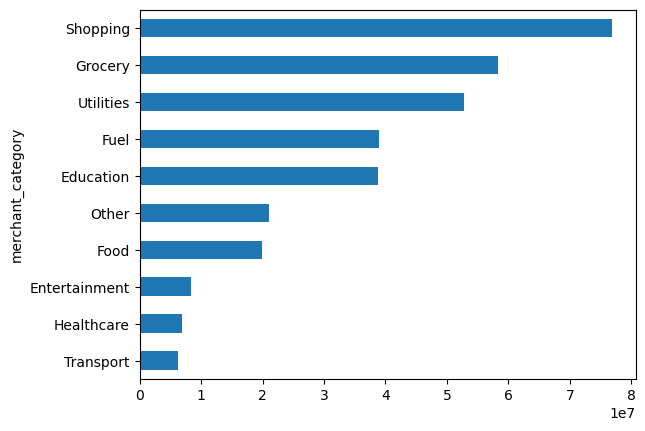

In [24]:
df.groupby('merchant_category')['amount (INR)'].sum().sort_values().plot(kind='barh')

0   2024-08-10 15:17:00
1   2024-11-04 06:56:00
2   2024-02-04 13:27:00
3   2024-07-01 10:09:00
4                   NaT
Name: timestamp, dtype: datetime64[ns]
datetime64[ns]


<Axes: xlabel='Hour'>

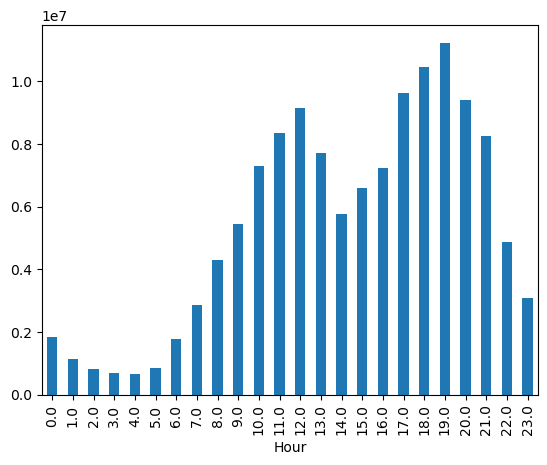

In [32]:
print(df['timestamp'].head())
print(df['timestamp'].dtype)
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['Hour'] = df['timestamp'].dt.hour
df.groupby('Hour')['amount (INR)'].sum().plot(kind='bar')

<Axes: ylabel='amount (INR)'>

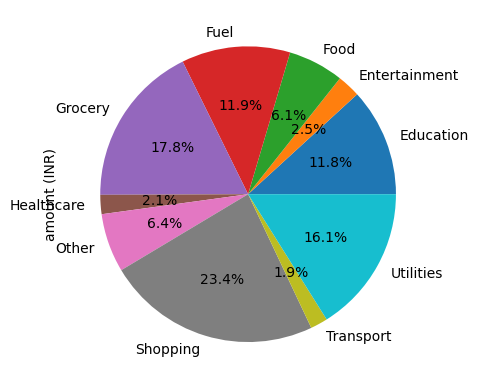

In [36]:
df.groupby('merchant_category')['amount (INR)'].sum().plot(kind='pie', autopct='%1.1f%%')

In [38]:
fail_rate = df[df['transaction_status'] != 'SUCCESS'].shape[0] / df.shape[0]
print(f"Fail rate: {fail_rate:.2%}")

Fail rate: 4.95%


#feature engineering

In [44]:
df['is_weekend'] = df['timestamp'].dt.dayofweek >= 5

#statistical Tests

In [47]:
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(df[df['IsWeekend']]['amount (INR)'], df[~df['IsWeekend']]['amount (INR)'])
print(f"T-test: t={t_stat}, p={p_val}")

T-test: t=0.3577147788101501, p=0.7205570740859055


In [48]:
print(df[['Hour', 'amount (INR)']].corr())

                  Hour  amount (INR)
Hour          1.000000     -0.000646
amount (INR) -0.000646      1.000000
